<a href="https://colab.research.google.com/github/parinitamohan10/machinelearning/blob/main/Red_Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN Wine Classification


Importing The Dependencies

In [1]:
# importing necessary libraries required
import os
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import seaborn as sns

Data Collection

In [2]:
# loading data from csv file to a pandas dataframe
redwine_data = pd.read_csv('/content/winequality-red.csv')

Information about data

In [3]:
# printing the number of rows and columns in the dataset
redwine_data.shape


(1599, 12)

In [4]:
# printing first five rows
redwine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# printing the data
print(redwine_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Data Preprocessing

In [6]:
# checking for missing values
print("Missing values:\n", redwine_data.isnull().sum())

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Quality                 0
dtype: int64


In [7]:
# creating a binary target variable
redwine_data['quality_label'] = redwine_data['Quality'].apply(lambda x: 1 if x >= 6 else 0)

# dropping the original quality column
redwine_data.drop('Quality', axis=1, inplace=True)

In [8]:
redwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [9]:
redwine_data.shape

(1599, 12)

Splitting the Data into Training and Test Data

In [10]:
# Features and target variable
X = redwine_data.drop('quality_label', axis=1)
y = redwine_data['quality_label']

# Normalizing the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=55)

In [11]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
X.shape

(1599, 11)

In [13]:
# training dataset after splitting
X_train.shape

(1279, 11)

In [14]:
# testing dataset after spliting
X_test.shape

(320, 11)

Training the K-NN Model

In [15]:
# Initializing the K-NN model with a chosen number of neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
# checking accuracy of the model
knn.score(X_test, y_test)

0.73125

Tunning Sensitivity of the Model to 'n_neighbors'

In [17]:
k_range = range(1, 25)
score =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))



Plotting the Data

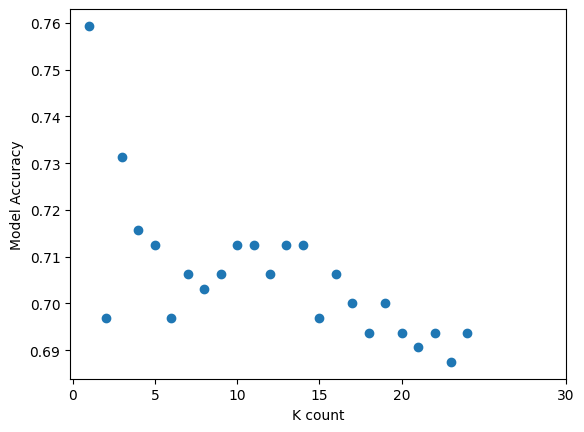

In [18]:
plt.figure()
plt.xlabel('K count')
plt.ylabel('Model Accuracy')
plt.scatter(k_range, score)
plt.xticks([0,5,10,15,20,30])
plt.show()

In [ ]:
test_sizes =[0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

knn = KNeighborsClassifier(n_neighbors=5)

plt.figure()

for test_size in test_sizes:
  score =[]

  for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1-test_size)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test,y_test))

  plt.plot(test_size, np.mean(score), 'bo')

plt.xlabel('Training split%')
plt.ylabel('Model Accuracy')
plt.show()

Make Predictions

In [ ]:
prediction = knn.predict(X_test)

In [ ]:
prediction

In [ ]:
y_test

Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, prediction)

In [ ]:
cm

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()